In [47]:
from google.colab import files # allows us to import Kaggle csv files into colab
uploaded = files.upload() # importing the model training data

Saving train.csv to train (5).csv


In [48]:
import pandas as pd # data manipulation and analysis library to store csv data
import io # allows us to manage file I/O
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) # importing csv data into pandas dataframe
df.drop("Id", axis=1, inplace=True) # dropping id column as it is not a feature of the data
df.drop("OverallQual", axis=1, inplace=True) # dropped for severely hindering graph readability
df = df.select_dtypes(['number']) # dropping non-numeric problems as they don't work with lightgbm
x = df.drop(["SalePrice"], axis=1) # setting data/input to be the dataframe without the label/output
y = df.SalePrice # setting label/output to be only that column of the dataframe

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

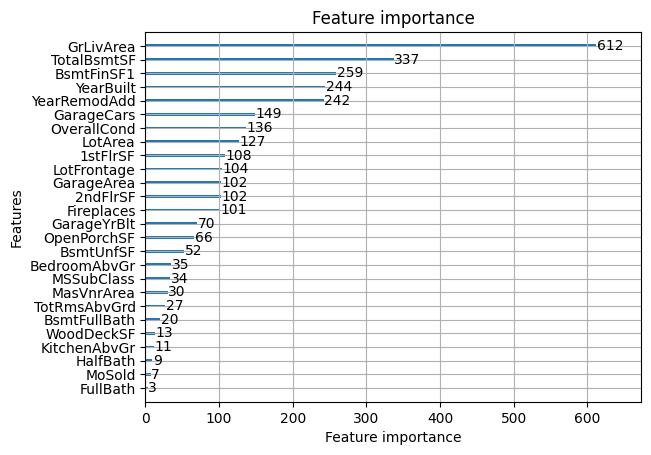

In [49]:
import lightgbm as ltb # gradient-boosting framework for machine learning
model = ltb.LGBMRegressor(learning_rate=0.01) # constructs gradient boosting model with learning rate passed as parameter
model.fit(x, y) # builds model based on training dataset x and y
# plots importance of model's features based on weight (the number of times a feature is used to split data across all trees)
ltb.plot_importance(model)

<p>This graph plots the importance of each feature based on its weight. Since gradient boosting utilizes a group (or ensemble) of trees, this importance is calculated by summing the number of times a feature is used to split data across all the regression trees. However, this doesn't necessarily tell us how much each feature impacted the output of the model. Therefore, we will utilize SHAP values to gain a better understanding of it.</p>

In [50]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


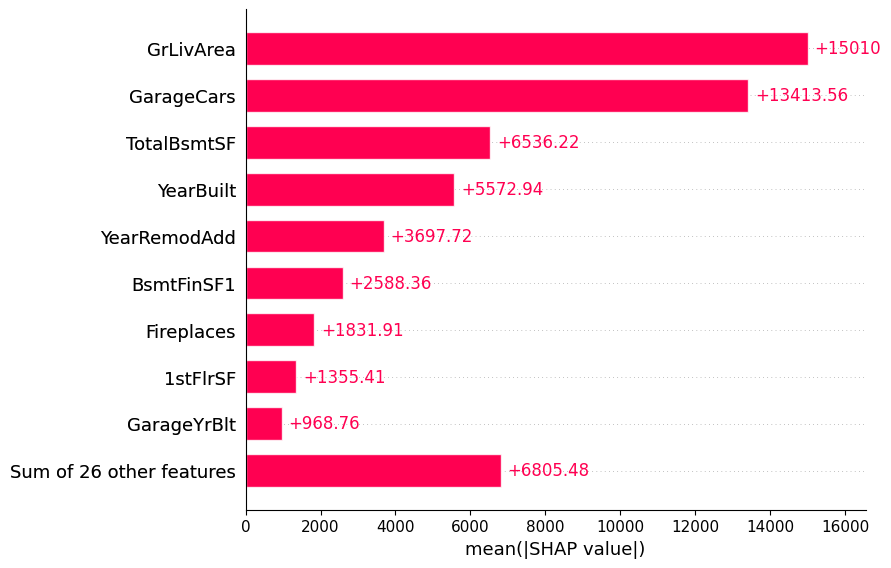

In [51]:
import shap # package for debugging and explaining machine learning models
explainer = shap.TreeExplainer(model) # creates TreeExplainer object
shap_values = explainer(x) # calculates shap values for features
shap.plots.bar(shap_values) # plots bar plot of mean absolute shap values for features across all input data

<p>From this graph, we can see how much each feature impacted the house price either positively or negatively (the absolute value of the SHAP value is taken) From this graph, it is evident that above ground living area in square footage had the most impact. In close second is the size of the garage in terms of car capacity. Finally, the total basement square footage as well as the year the house was built had a smaller but relatively large impact on the house price.</p>

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


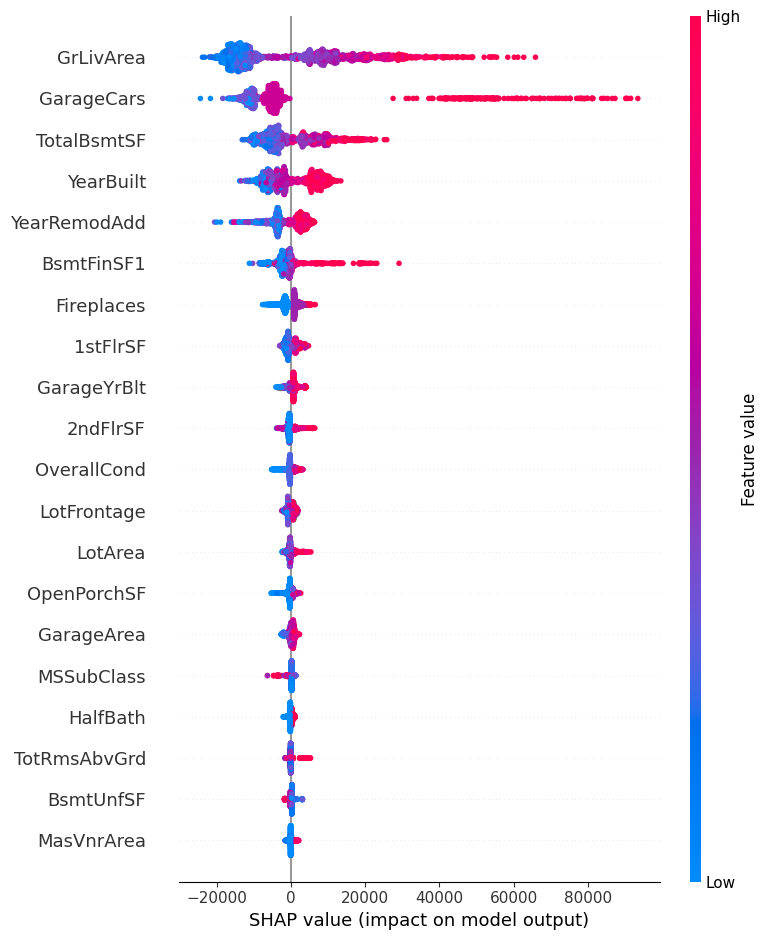

In [52]:
import shap # package for debugging and explaining machine learning models
explainer = shap.TreeExplainer(model) # creates TreeExplainer object
shap_values = explainer(x) # calculates shap values for features
shap.summary_plot(shap_values, x) # plots beeswarm plot of all shap values for features across all the input data

<p>In this graph, we can see all the data points. For each feature, a more blue datapoint represents a lower value for that featuer while a more red value represents a higher value for that feature. From the graph, we can see that a higher above ground living area square footage, size of garage in car capacity, and total basement square footage resulted in higher SHAP values. Additionally, having a more recently built house or recently remodeled house increased SHAP values. While a higher value increases the SHAP value in most cases, an example of a feature for which this trend is reversed is the unfinished square feet of basement area.</p>

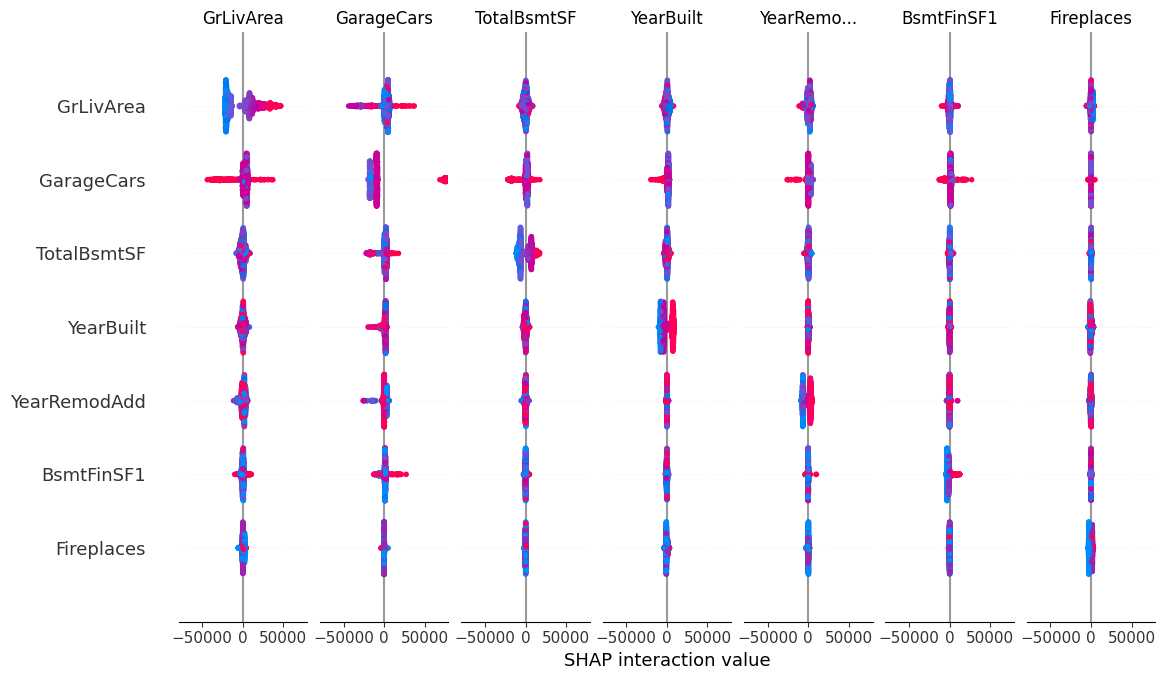

In [53]:
shap_interaction = shap.TreeExplainer(model).shap_interaction_values(x) # calculates shap interactions values for features across all input data
shap.summary_plot(shap_interaction, x) # plots the shap interaction values